# CENTRAL LIMIT THEOREM

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42

In [8]:
df = pd.read_csv('adult.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df.shape

(48842, 15)

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

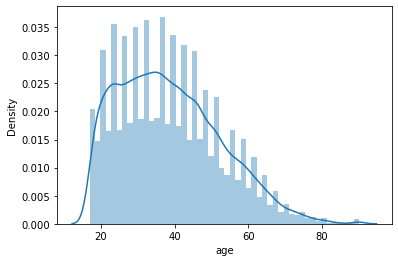

In [12]:
sns.distplot(df['age'])

In [13]:
print('Number of rows: ', df.shape[0])

Number of rows:  48842


In [14]:
samples = random.sample(range(0, df.shape[0]), 50)

In [15]:
df.iloc[samples]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48615,24,Private,176580,5th-6th,3,Married-spouse-absent,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K
10519,31,Self-emp-not-inc,404062,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,Portugal,>50K
18376,49,Private,168211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,40,United-States,>50K
1822,58,Private,223214,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
19393,24,Private,219754,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
20503,41,Private,125461,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K
26814,38,Private,192337,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,England,>50K
46312,40,Local-gov,303212,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
24045,42,Private,445940,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
24014,42,Private,190543,Some-college,10,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States,>50K


In [17]:
sample_mean = {}
means = []
for i in range(0, 100):
    samples = random.sample(range(0, df.shape[0]), 50)
    means.append(df.iloc[samples, 0].mean())

sample_mean['100sam_with_50ele'] = means

In [18]:
np.mean(sample_mean['100sam_with_50ele'])

39.0974

<AxesSubplot:ylabel='Density'>

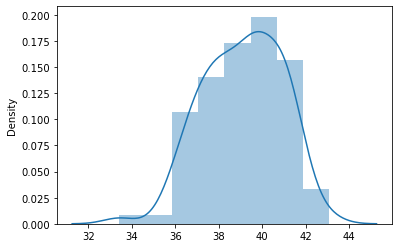

In [20]:
sns.distplot(np.array(sample_mean['100sam_with_50ele']))

In [21]:
means = []
for i in range(0, 100):
    samples = random.sample(range(0, df.shape[0]), 100)
    means.append(df.iloc[samples, 0].mean())

sample_mean['100sam_with_100ele'] = means

In [22]:
np.mean(sample_mean['100sam_with_100ele'])

38.642700000000005

<AxesSubplot:ylabel='Density'>

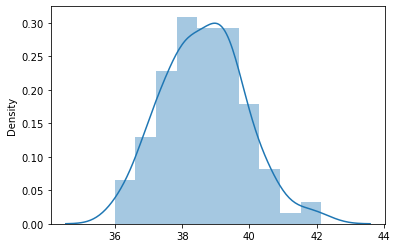

In [23]:
sns.distplot(np.array(sample_mean['100sam_with_100ele']))

In [24]:
def fun(n_sample, m_element):
    means = []
    for i in range(0, n_sample):
        samples = random.sample(range(0, df.shape[0]), m_element)
        means.append(df.iloc[samples, 0].mean())
    return means

In [25]:
sample_mean = {}

sample_mean['100sam_with_50ele'] = fun(100, 50)
sample_mean['1000sam_with_50ele'] = fun(1000, 50)

sample_mean['100sam_with_100ele'] = fun(100, 100)
sample_mean['1000sam_with_100ele'] = fun(1000, 100)

sample_mean['100sam_with_1000ele'] = fun(100, 1000)
sample_mean['1000sam_with_1000ele'] = fun(1000, 1000)

Text(0.5, 1.0, '1000sam_with_1000ele')

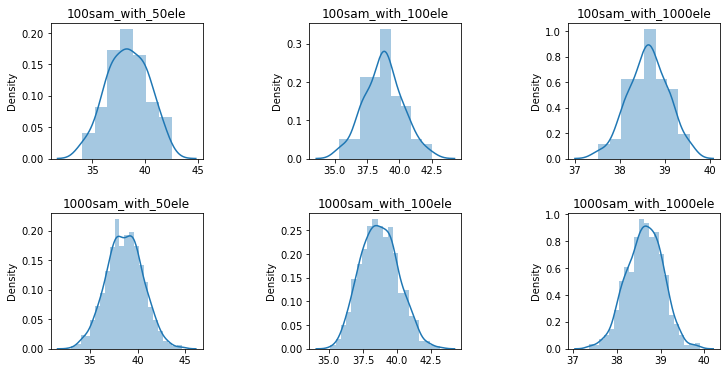

In [26]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
sns.distplot(np.array(sample_mean['100sam_with_50ele']))
plt.title('100sam_with_50ele')

plt.subplot(2, 3, 2)
sns.distplot(np.array(sample_mean['100sam_with_100ele']))
plt.title('100sam_with_100ele')

plt.subplot(2, 3, 3)
sns.distplot(np.array(sample_mean['100sam_with_1000ele']))
plt.title('100sam_with_1000ele')

plt.subplot(2, 3, 4)
sns.distplot(np.array(sample_mean['1000sam_with_50ele']))
plt.title('1000sam_with_50ele')

plt.subplot(2, 3, 5)
sns.distplot(np.array(sample_mean['1000sam_with_100ele']))
plt.title('1000sam_with_100ele')

plt.subplot(2, 3, 6)
sns.distplot(np.array(sample_mean['1000sam_with_1000ele']))
plt.title('1000sam_with_1000ele')

In [27]:
for i, key in enumerate(sample_mean.keys()):
    print(key, np.mean(sample_mean[key]))

100sam_with_50ele 38.319599999999994
1000sam_with_50ele 38.634260000000005
100sam_with_100ele 38.7536
1000sam_with_100ele 38.72385
100sam_with_1000ele 38.62967
1000sam_with_1000ele 38.635953


In [28]:
print('Actual Mean: ', df.iloc[:,0].mean())

Actual Mean:  38.64358543876172


In [29]:
def fun_std(n_sample, m_element):
    std = []
    for i in range(0, n_sample):
        samples = random.sample(range(0, df.shape[0]), m_element)
        means.append(df.iloc[samples, 0].std())
    return std

In [30]:
sample_std = {}

sample_std['100sam_with_50ele'] = fun(100, 50)
sample_std['1000sam_with_50ele'] = fun(1000, 50)

sample_std['100sam_with_100ele'] = fun(100, 100)
sample_std['1000sam_with_100ele'] = fun(1000, 100)

sample_std['100sam_with_1000ele'] = fun(100, 1000)
sample_std['1000sam_with_1000ele'] = fun(1000, 1000)

Text(0.5, 1.0, '1000sam_with_1000ele')

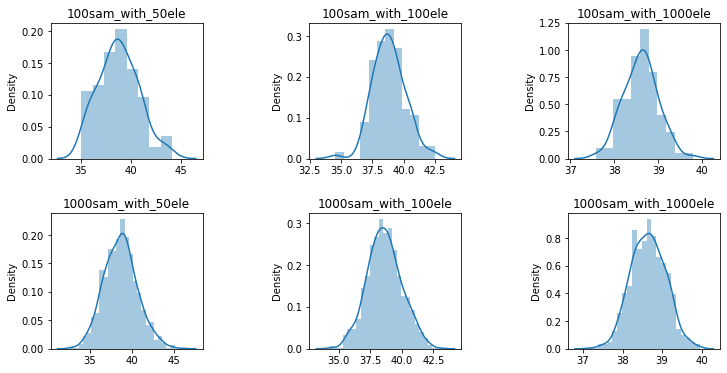

In [31]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
sns.distplot(np.array(sample_std['100sam_with_50ele']))
plt.title('100sam_with_50ele')

plt.subplot(2, 3, 2)
sns.distplot(np.array(sample_std['100sam_with_100ele']))
plt.title('100sam_with_100ele')

plt.subplot(2, 3, 3)
sns.distplot(np.array(sample_std['100sam_with_1000ele']))
plt.title('100sam_with_1000ele')

plt.subplot(2, 3, 4)
sns.distplot(np.array(sample_std['1000sam_with_50ele']))
plt.title('1000sam_with_50ele')

plt.subplot(2, 3, 5)
sns.distplot(np.array(sample_std['1000sam_with_100ele']))
plt.title('1000sam_with_100ele')

plt.subplot(2, 3, 6)
sns.distplot(np.array(sample_std['1000sam_with_1000ele']))
plt.title('1000sam_with_1000ele')